In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "Air BNB.csv"   # Change path if needed
df = pd.read_csv(file_path)

# Preview data
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (60268, 26)
Columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


/tmp/ipython-input-730565247.py:8: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.columns = [c.lower().replace(" ", "_") for c in df.columns]

In [ ]:
print('columns:',df.columns.tolist())

columns: ['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']


In [ ]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_identity_verified,object
host_name,object
neighbourhood_group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [ ]:
df['price'] = df['price'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)
df['service_fee'] = df['service_fee'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

/tmp/ipython-input-1398174475.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [ ]:
df.dtypes
df.isnull().sum()

,0
id,0
name,195
host_id,0
host_identity_verified,217
host_name,248
neighbourhood_group,29
neighbourhood,16
lat,8
long,8
country,95


In [ ]:
df.fillna({'reviews_per_month': 0, 'last_review': pd.NaT}, inplace=True)
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 id                                    0
name                                195
host_id                               0
host_identity_verified              217
host_name                           248
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                              95
country_code                         87
instant_bookable                     87
cancellation_policy                  58
room_type                             1
construction_year                   191
price                               141
service_fee                         141
minimum_nights                      364
number_of_reviews                   152
last_review                       10708
reviews_per_month                     0
review_rate_number                  214
calculated_host_listings_count      145
availability_365                    433
house_ru

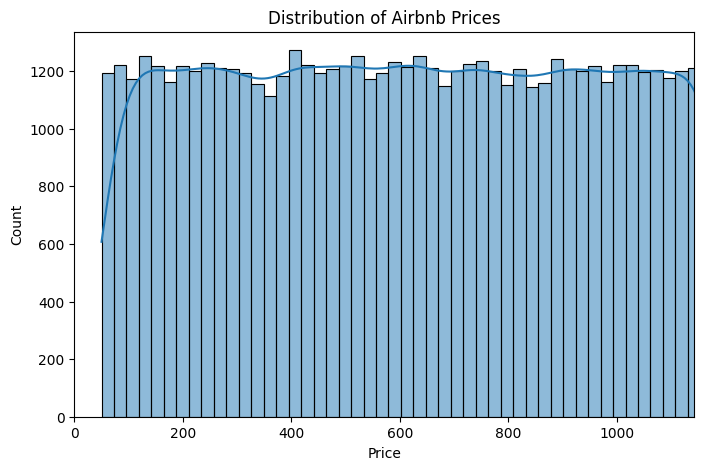

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlim(0, df['price'].quantile(0.95))  # Ignore extreme outliers
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


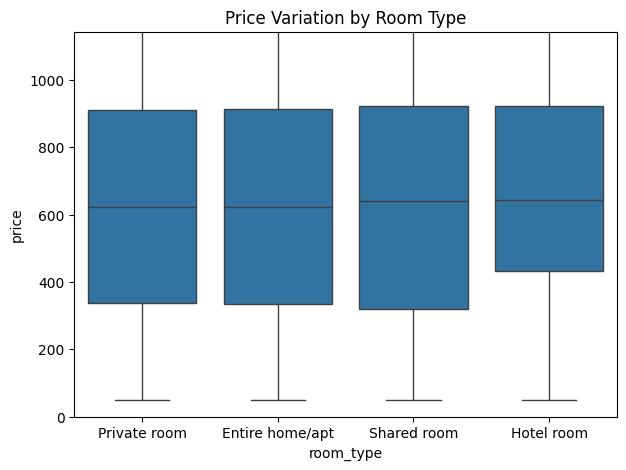

Average Price per Room Type:
 room_type
Entire home/apt    624.217730
Hotel room         653.545455
Private room       624.481461
Shared room        628.568702
Name: price, dtype: float64


In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, df['price'].quantile(0.95))
plt.title("Price Variation by Room Type")
plt.show()

print("Average Price per Room Type:\n", df.groupby("room_type")['price'].mean())


/tmp/ipython-input-3449765226.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean, ci=None)


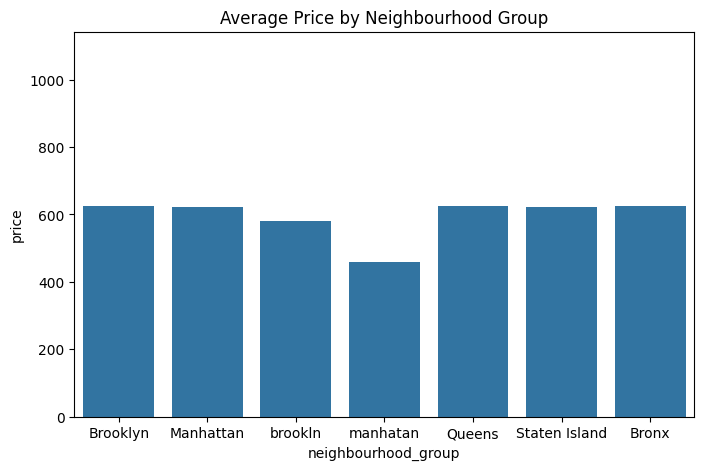

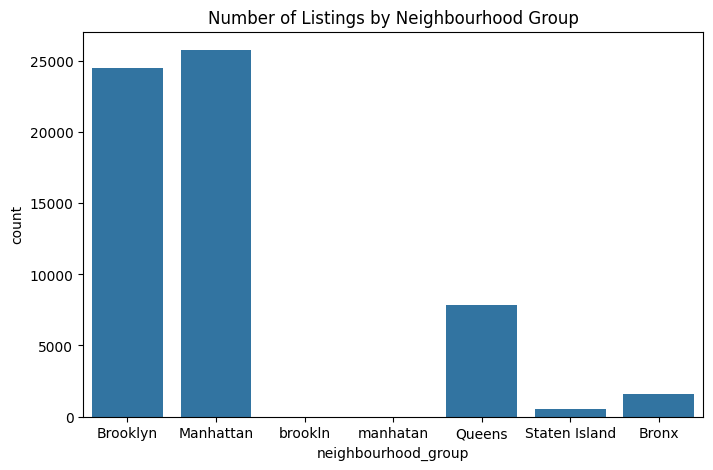

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean, ci=None)
plt.ylim(0, df['price'].quantile(0.95))
plt.title("Average Price by Neighbourhood Group")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood_group', data=df)
plt.title("Number of Listings by Neighbourhood Group")
plt.show()


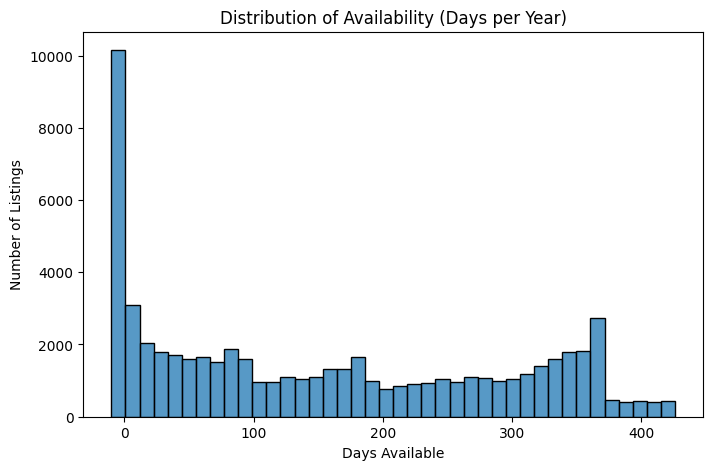

Availability Stats:
 count    59835.000000
mean       154.700994
std        134.321460
min        -10.000000
25%         21.000000
50%        129.000000
75%        282.000000
max        426.000000
Name: availability_365, dtype: float64


In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['availability_365'], bins=40, kde=False)
plt.title("Distribution of Availability (Days per Year)")
plt.xlabel("Days Available")
plt.ylabel("Number of Listings")
plt.show()

print("Availability Stats:\n", df['availability_365'].describe())


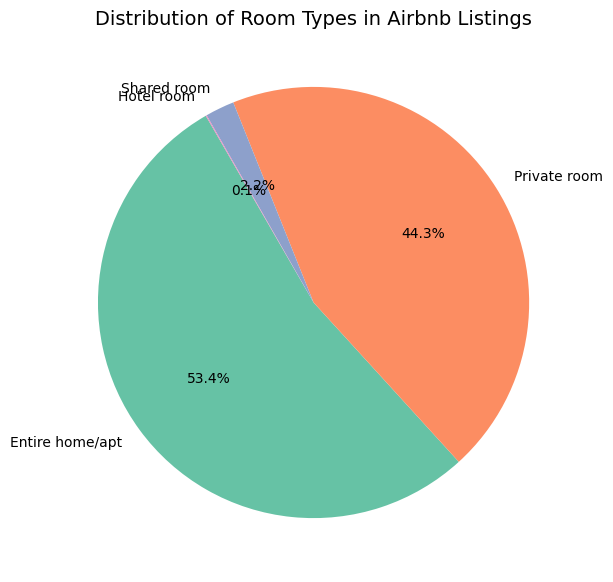

In [ ]:
df['room_type'].fillna(df['room_type'].mode()[0], inplace=True)

# Count room types
room_counts = df['room_type'].value_counts()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=120, colors=plt.cm.Set2.colors)
plt.title("Distribution of Room Types in Airbnb Listings", fontsize=14)
plt.show()

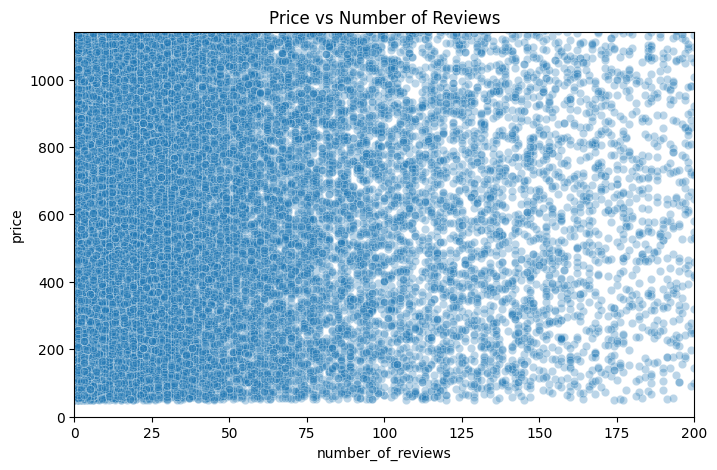

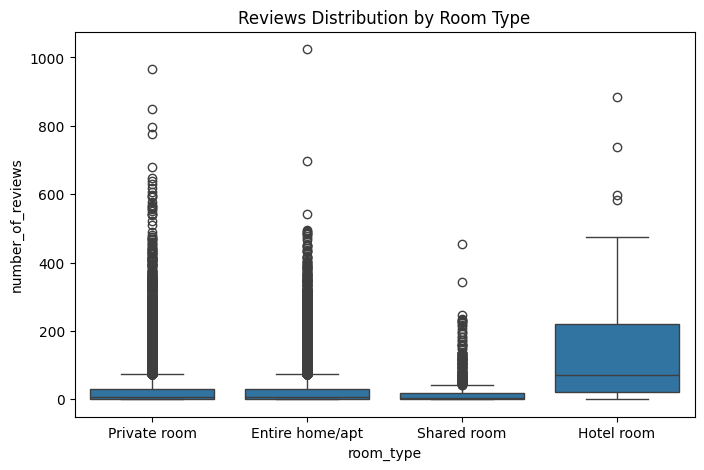

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.3)
plt.xlim(0, 200)
plt.ylim(0, df['price'].quantile(0.95))
plt.title("Price vs Number of Reviews")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='number_of_reviews', data=df)
plt.title("Reviews Distribution by Room Type")
plt.show()
